### Importing Libraries

In [1]:
# !pip install pycaret
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

### Load and View Dataset

In [2]:
# Load your dataset
data = pd.read_csv('Breast_Cancer_Wisconsin.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Exploratory Data Analysis: Correlation Matrix

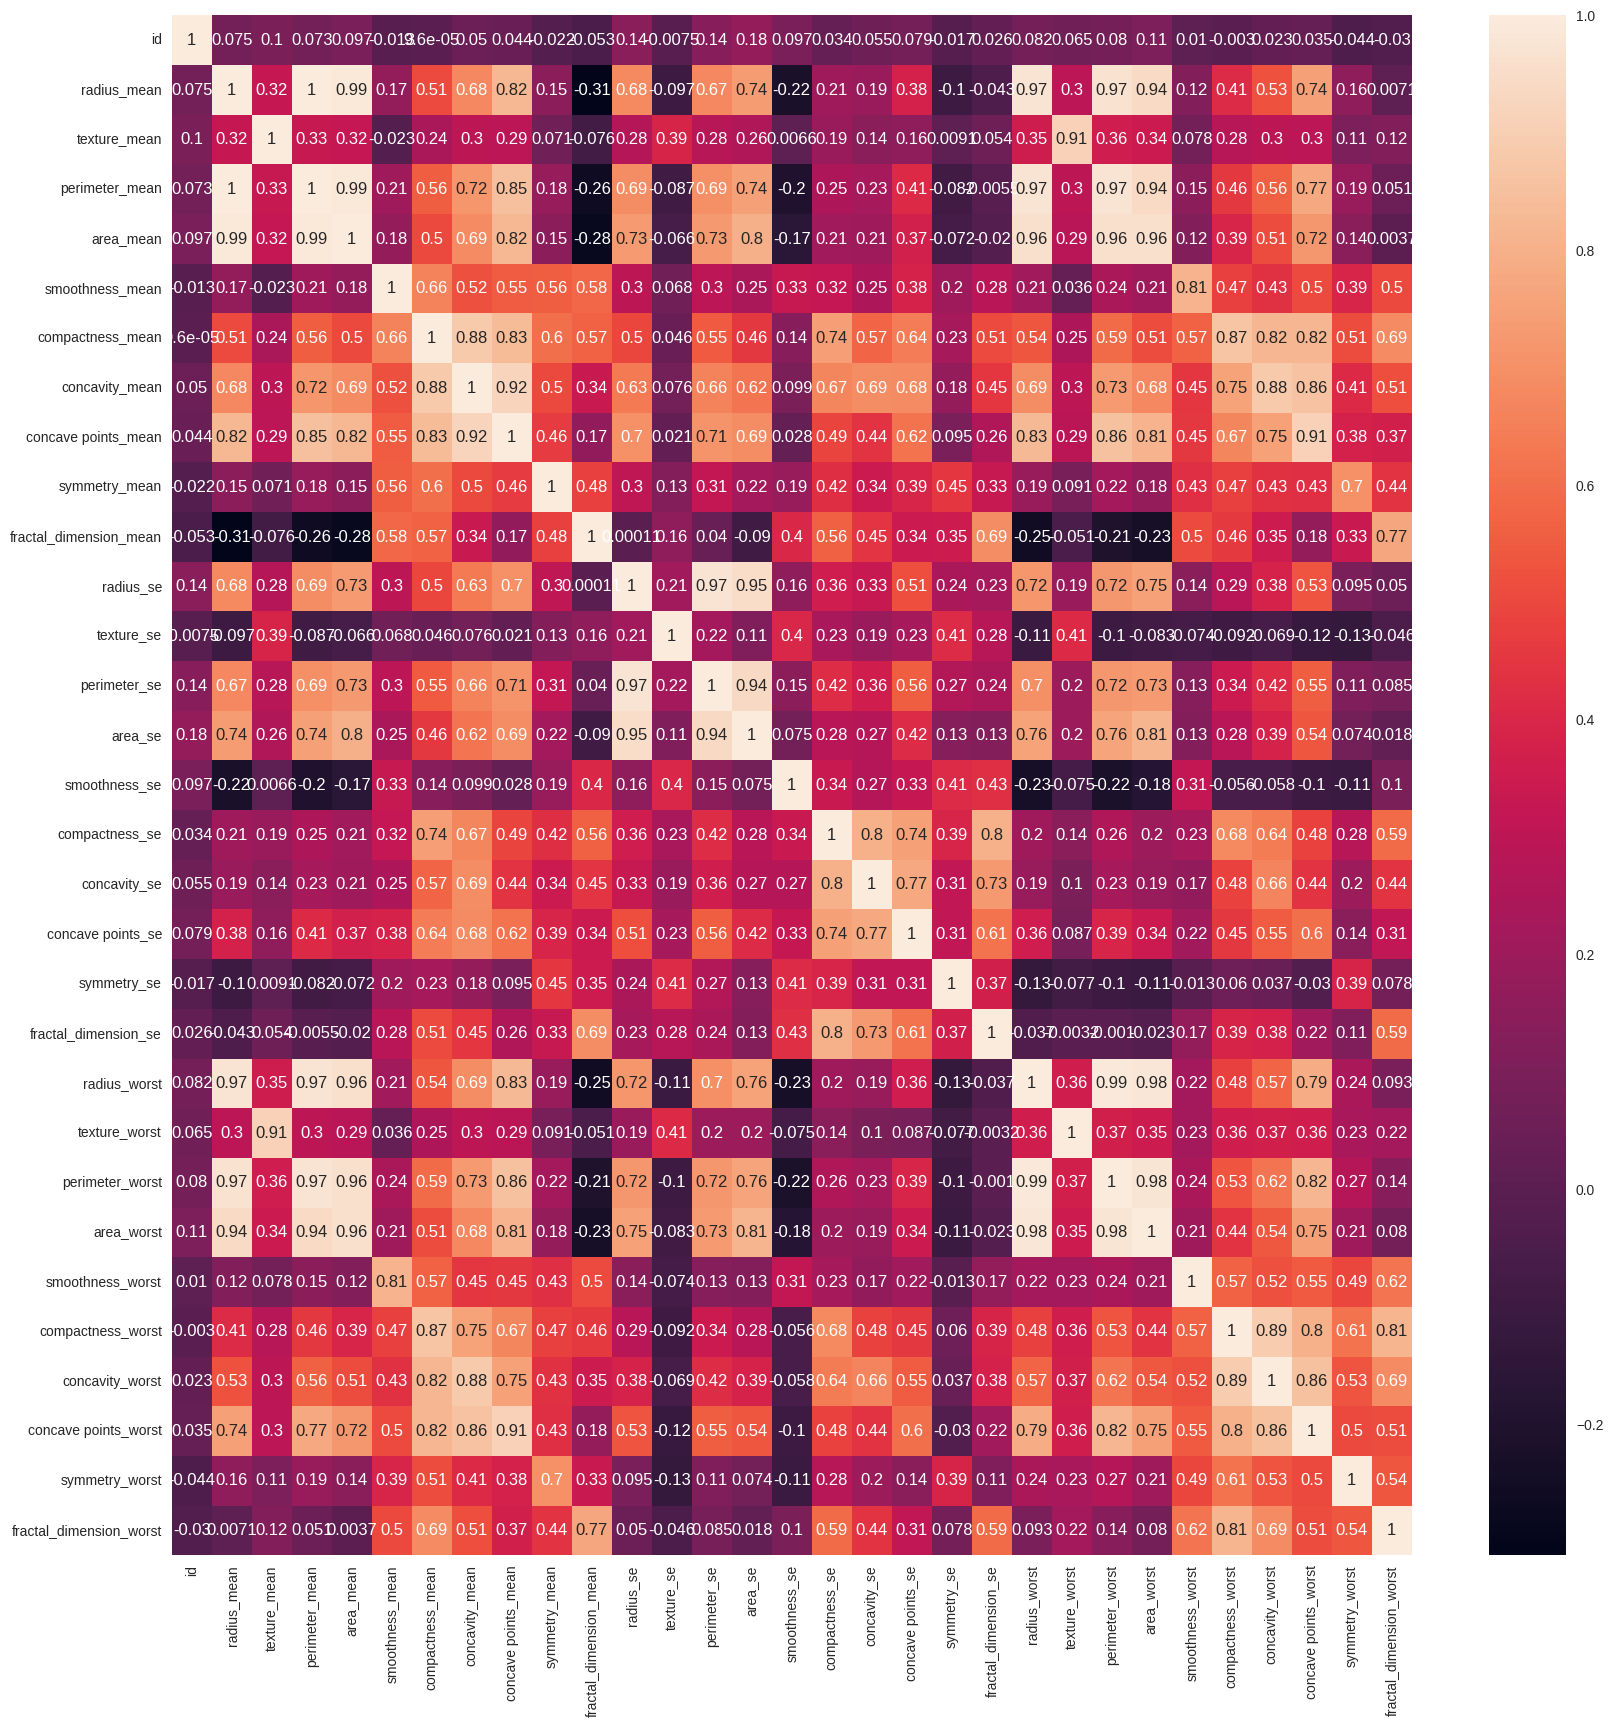

In [3]:
# Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Breast Cancer Prediction Using PyCaret without Principal Component Analysis

###  Setting up PyCaret without PCA

In [4]:
# Without using PCA
clf = setup(data=data,
            target='diagnosis',
            normalize=True,
            feature_selection=True,
            session_id=123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 7)"
6,Transformed train set shape,"(398, 7)"
7,Transformed test set shape,"(171, 7)"
8,Numeric features,31
9,Preprocess,True


### Machine Learning Models Scores and Model Evaluation (Without PCA)

In [5]:
# Train models and select the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9699,0.9941,0.9699,0.9713,0.9699,0.9356,0.9372,1.4710
svm,SVM - Linear Kernel,0.9699,0.0000,0.9699,0.9714,0.9699,0.9356,0.9372,0.1370
ridge,Ridge Classifier,0.9624,0.0000,0.9624,0.9646,0.9619,0.9179,0.9211,0.1400
et,Extra Trees Classifier,0.9624,0.9938,0.9624,0.9633,0.9622,0.9190,0.9202,0.3180
rf,Random Forest Classifier,0.9623,0.9921,0.9623,0.9637,0.9621,0.9184,0.9204,0.4800
lda,Linear Discriminant Analysis,0.9598,0.9925,0.9598,0.9625,0.9592,0.9119,0.9157,0.1420
lightgbm,Light Gradient Boosting Machine,0.9597,0.9878,0.9597,0.9607,0.9596,0.9131,0.9144,0.3800
gbc,Gradient Boosting Classifier,0.9496,0.9894,0.9496,0.9516,0.9494,0.8915,0.8939,0.2560
qda,Quadratic Discriminant Analysis,0.9472,0.9837,0.9472,0.9493,0.9469,0.8859,0.8887,0.2110
xgboost,Extreme Gradient Boosting,0.9471,0.9867,0.9471,0.9500,0.9473,0.8878,0.8902,0.3050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Feature Importance

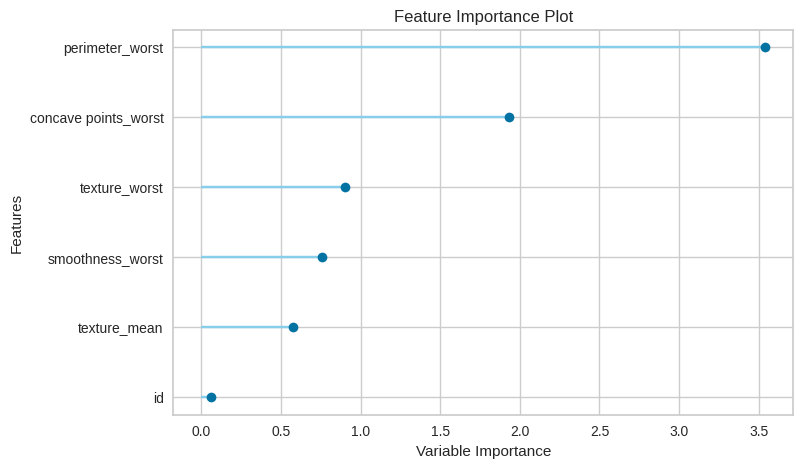

In [6]:
# Plotting Feature Importance
plot_model(best_model, plot='feature')

In [7]:
# Evaluating the model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
# Predicting on hold-out test set
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9474,0.9855,0.9474,0.9476,0.9474,0.8880,0.8881


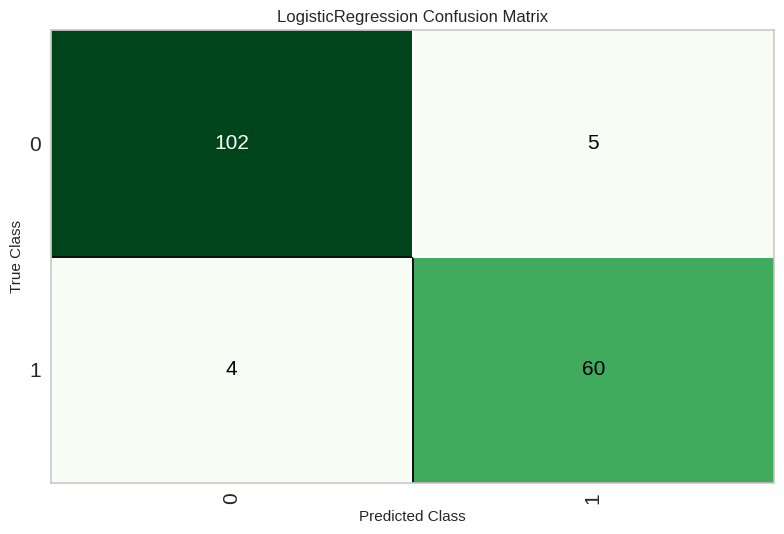

In [9]:
# Plotting Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

## Breast Cancer Prediction Using PyCaret with Principal Component Analysis

###  Setting up PyCaret with PCA

In [10]:
# Setting up PyCaret with PCA
clf = setup(data=data,
            target='diagnosis',
            normalize=True,
            feature_selection=True,
            pca=True,
            pca_components=0.95,
            session_id=123)

[LightGBM] [Info] Number of positive: 148, number of negative: 250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371859 -> initscore=-0.524249
[LightGBM] [Info] Start training from score -0.524249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 7)"
6,Transformed train set shape,"(398, 7)"
7,Transformed test set shape,"(171, 7)"
8,Numeric features,31
9,Preprocess,True


### Machine Learning Models Scores and Model Evaluation (With PCA)

In [11]:
# Train models and select the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9799,0.9986,0.9799,0.9813,0.9799,0.9569,0.9585,0.1030
xgboost,Extreme Gradient Boosting,0.9749,0.9943,0.9749,0.9763,0.9748,0.9460,0.9476,0.1260
qda,Quadratic Discriminant Analysis,0.9724,0.9981,0.9724,0.9745,0.9722,0.9403,0.9428,0.0960
et,Extra Trees Classifier,0.9724,0.9942,0.9724,0.9743,0.9721,0.9400,0.9425,0.3210
lightgbm,Light Gradient Boosting Machine,0.9699,0.9970,0.9699,0.9731,0.9696,0.9349,0.9387,0.2000
svm,SVM - Linear Kernel,0.9674,0.0000,0.9674,0.9703,0.9675,0.9309,0.9337,0.1030
knn,K Neighbors Classifier,0.9599,0.9838,0.9599,0.9624,0.9592,0.9122,0.9159,0.1520
gbc,Gradient Boosting Classifier,0.9597,0.9940,0.9597,0.9637,0.9599,0.9150,0.9185,0.2800
ada,Ada Boost Classifier,0.9573,0.9935,0.9573,0.9585,0.9571,0.9079,0.9095,0.1910
ridge,Ridge Classifier,0.9524,0.0000,0.9524,0.9573,0.9510,0.8938,0.9012,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Feature Importance

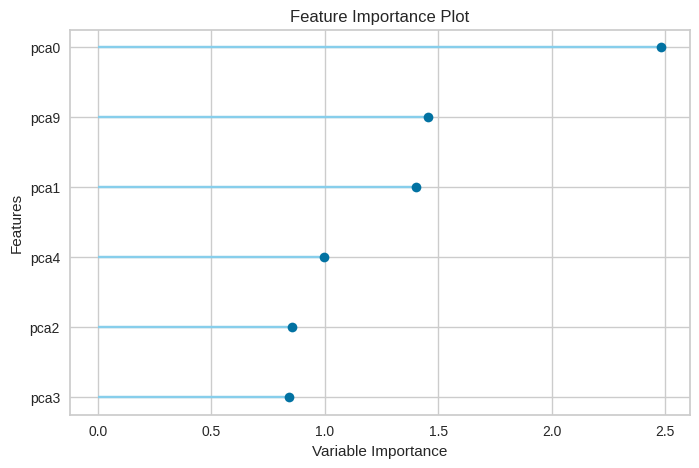

In [12]:
# Plotting Feature Importance
plot_model(best_model, plot='feature')

In [13]:
# Evaluating the model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# Predicting on hold-out test set
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9649,0.9857,0.9649,0.9649,0.9649,0.9251,0.9251


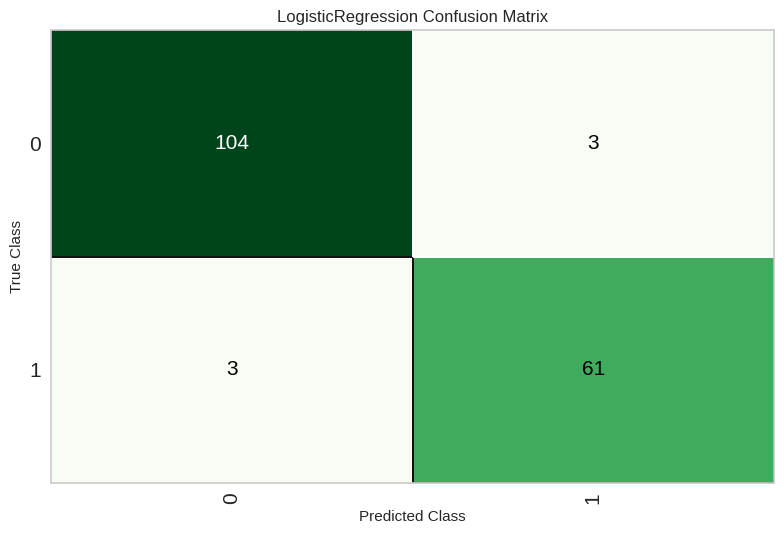

In [15]:
# Plotting Confusion Matrix 
plot_model(best_model, plot='confusion_matrix')

### Conclusion: 

### The application of Principal Component Analysis (PCA) in breast cancer prediction using machine learning models, particularly Logistic Regression, resulted in superior performance compared to models without PCA. This improvement is attributed to PCA's effectiveness in reducing data dimensionality and noise, thereby enhancing the model's focus on the most relevant features, reducing overfitting, and improving training efficiency. These factors contribute to better accuracy, precision, recall, and overall model reliability in complex datasets.